In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("../../../data/Advertising.csv")
data.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
data.columns

Index(['TV', 'sales'], dtype='object')

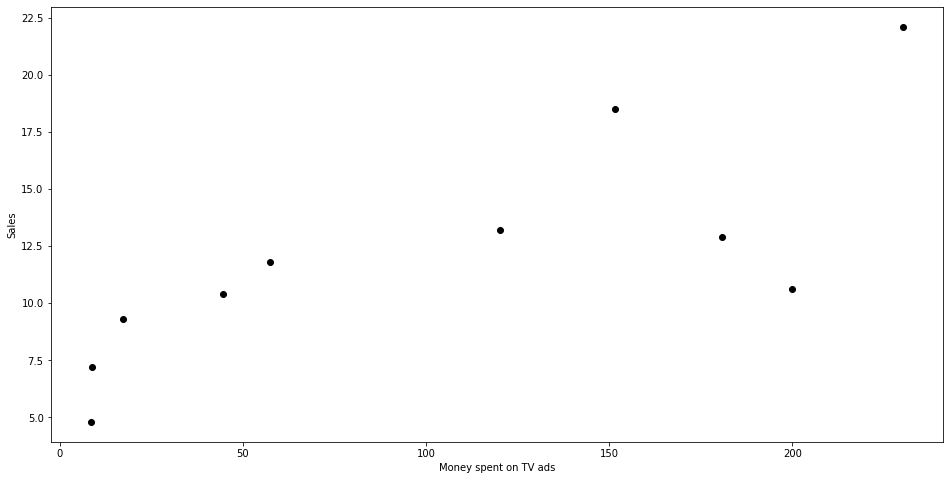

In [4]:
plt.figure(figsize=(16, 8))
plt.scatter(data['TV'], data['sales'], c = 'black')
plt.xlabel("Money spent on TV ads")
plt.ylabel("Sales")
plt.show()

### 自己实现线性回归

目标函数

$ y = w * x + b $

损失函数

$ loss = \sum_i(w * x_i + b - y_i)^2 $

梯度更新

$ w' = w - lr * \frac {\partial loss} {\partial w} $

$ b' = b - lr * \frac {\partial loss} {\partial b} $

为什么梯度更新一定可以达到局部最优？

通过推导可以知道，梯度方向一定是往函数值（模）增大的方向，所以只要我们往反方向走，一般就能走到更小（更优）值


In [10]:
# 实现损失函数 损失函数直接求和会非常大，可能导致越界，一般用平均值来表示
# 注意这里使用了平均值，所以后续计算偏导时，也要对loss/N求偏导
def compute_error_for_line_given_points(b, w, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0] # numpy特性 等同points[i][0]
        y = points[i, 1]
        # computer mean-squared-error
        totalError += (y - (w * x + b)) ** 2
    # average loss for each point
    return totalError / float(len(points))

# 实现梯度下降
def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # grad_b = 2(wx+b-y)
        b_gradient += (2/N) * ((w_current * x + b_current) - y) # N对应损失函数里的平均，2是求导得到
        # grad_w = 2(wx+b-y)*x
        w_gradient += (2/N) * x * ((w_current * x + b_current) - y)

    # update w'
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    return [new_b, new_w]

def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    # update for several times
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learning_rate)
    return [b, w]


# points = np.genfromtxt("data.csv", delimiter=",")
points = data.values
learning_rate = 0.000001 #有时会出现无法收敛，一般需要降低学习率
initial_b = 0 # initial y-intercept guess
initial_w = 0 # initial slope guess
num_iterations = 1000
print("Starting gradient descent at b = {0}, w = {1}, error = {2}"
        .format(initial_b, initial_w,
                compute_error_for_line_given_points(initial_b, initial_w, points))
        )
print("Running...")
[b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
print("After {0} iterations b = {1}, w = {2}, error = {3}".
        format(num_iterations, b, w,
                compute_error_for_line_given_points(b, w, points))
        )

Starting gradient descent at b = 0, w = 0, error = 169.24399999999997
Running...
0.0030659959999999997
0.006028548361620777
0.008891147130976402
0.011657164604824239
0.014329859303266312
0.016912379808417206
0.019407768473560585
0.021818965007163876
0.02414880993597322
0.02640004795126836
0.028575331142219492
0.030677222120155116
0.03270819703742135
0.03467064850438914
0.03656688840804559
0.03839915063548994
0.04016959370554254
0.04188030331156692
0.04353329477850057
0.04513051543698888
0.04667384691741903
0.048165107366556374
0.049606053589394565
0.05099838311874254
0.052343736214986544
0.053643697798382926
0.054899799316158016
0.05611352054661462
0.05728629134237047
0.05841949331478215
0.059514461461538944
0.060572485739343866
0.06159481258353458
0.06258264637643444
0.06353715086616338
0.06445945053758001
0.0653506319369701
0.06621174495204188
0.06704380404873597
0.06784778946630718
0.06862464837208578
0.06937529597727876
0.07010061661512552
0.07080146478267801
0.07147866614743265
0.

### 使用Keras回归

In [6]:
# -1表示不指定，自动计算有多少行
# values是ndarray, reshape得到的是ndarray, 二维数组
X = data['TV'].values.reshape(-1, 1)
Y = data['sales'].values.reshape(-1, 1)
print(X)
reg = LinearRegression()
reg.fit(X, Y)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]]


LinearRegression()

In [7]:
print("线性模型：Y = {:.5}X + {:.5}".format(reg.coef_[0][0], reg.intercept_[0]))

线性模型：Y = 0.046579X + 7.334


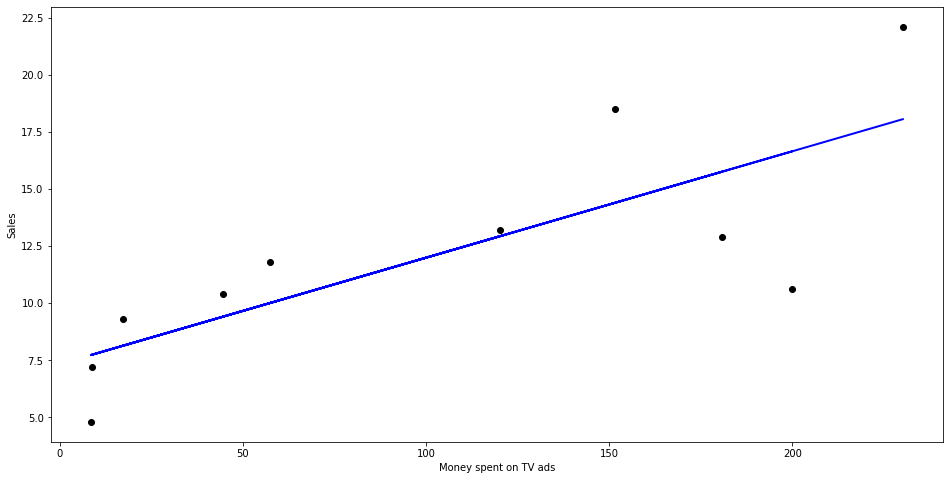

In [8]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(data['TV'], data['sales'], c = 'black')
plt.plot(data['TV'], predictions, c='blue', linewidth=2)
plt.xlabel("Money spent on TV ads")
plt.ylabel("Sales")
plt.show()


In [9]:
# 这里输入有可能是多种feature,然后支持预测多组数据，所以默认是矩阵
predictions = reg.predict([[100]])